[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/itmorn/AI.handbook/blob/main/DL/torch/nn/LossFunction/SmoothL1Loss.ipynb)

# SmoothL1Loss
创建一个标准，如果绝对元素误差低于beta，则使用平方项，否则使用L1项。它对异常值的敏感度低于torch.nn.MSELoss，在某些情况下可以防止梯度爆炸(例如，参见Ross Girshick的Fast R-CNN论文)。

$$l_n = \begin{cases}
        0.5 (x_n - y_n)^2 / beta, & \text{if } |x_n - y_n| < beta \\
        |x_n - y_n| - 0.5 * beta, & \text{otherwise }
\end{cases}$$

**定义**：  
torch.nn.HuberLoss(reduction='mean', delta=1.0)

**参数**:  
- reduction (str, optional) – Specifies the reduction to apply to the output: 'none' | 'mean' | 'sum'.   指定应用于输出的缩减:'none' | 'mean' | 'sum'。

- beta (float, optional) – Specifies the threshold at which to change between L1 and L2 loss. The value must be non-negative. Default: 1.0  L1和L2损失之间变化的阈值。取值必须为非负。默认值:1.0

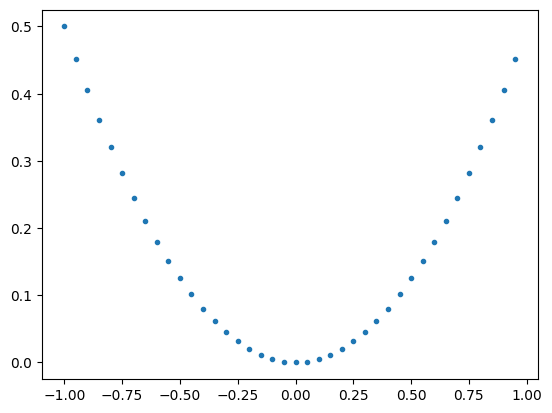

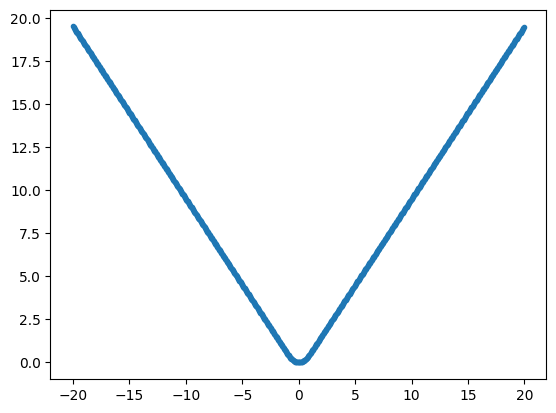

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

beta = 1.0
y_true = 0.0
input = torch.arange(start=-1, end=1, step=0.05, dtype=torch.float)
target = torch.full_like(input,fill_value=y_true)
smoothL1Loss = nn.SmoothL1Loss(reduction='none',beta=beta)
loss = smoothL1Loss(input, target)
plt.scatter(input,loss,marker=".")
plt.show()  # 可以看到 y_true 附近 是曲线，两边是两条射线。

input = torch.arange(start=-20, end=20, step=0.05, dtype=torch.float)
target = torch.full_like(input,fill_value=y_true)
smoothL1Loss = nn.SmoothL1Loss(reduction='none',beta=beta)
loss = smoothL1Loss(input, target)
plt.scatter(input,loss,marker=".")
plt.show()  # 可以看到 y_true 附近 是曲线，两边是两条射线。

In [3]:
# 调包计算
import torch
import torch.nn as nn
torch.manual_seed(666)

beta = 1.0
smoothL1Loss = nn.SmoothL1Loss(reduction='mean',beta=beta)

input = torch.randn(3, 5, requires_grad=True) #N,C
target = torch.randn(3, 5)
print("input:\n", input, "\n")
print("target:\n", target, "\n")

loss = smoothL1Loss(input, target)
print("loss:\n", loss, "\n")
# output.backward()

zeros = torch.zeros_like(input)
mask_L2 = (input - target < beta) & (target - input < beta)
ouput_L2 = torch.where(mask_L2 == True, 0.5*(input-target)**2, zeros)
ouput_L1 = torch.where(mask_L2 == False, (target - input).abs()-0.5*beta, zeros)
output = ouput_L1+ouput_L2
output.mean() #可以看到，和调包结果一致 另外按照默认参数计算的话，数值和HuberLoss也是一致的

input:
 tensor([[-2.1188,  0.0635, -1.4555, -0.0126, -0.1548],
        [-0.0927,  2.5916,  0.4542, -0.6890, -0.9962],
        [ 0.1856,  0.1476,  0.8628,  0.2379, -0.5260]], requires_grad=True) 

target:
 tensor([[-0.1043, -0.5187,  0.1231,  0.0755,  0.7091],
        [-1.0812, -0.6668, -0.8967,  0.7272,  1.4582],
        [-0.0018,  0.6660,  1.4064, -0.1019, -0.1370]]) 

loss:
 tensor(0.7027, grad_fn=<SmoothL1LossBackward0>) 



tensor(0.7027, grad_fn=<MeanBackward0>)

# 参考资料
https://www.bilibili.com/video/BV1K64y1Q7wu?p=2&vd_source=a0ed88162ba357c3f44aa427ad89574b